# Import necessary libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?dl=0

--2021-07-07 05:07:28--  https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dtw18saps0231yn/BrainTumorData.zip [following]
--2021-07-07 05:07:28--  https://www.dropbox.com/s/raw/dtw18saps0231yn/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc79d24376bafb63d70b3c186fb9.dl.dropboxusercontent.com/cd/0/inline/BR0zhzpa9L4stnjJnbBKutGf74Bybc2wRKrRQnrRwljFdPcjOaOlyIONDNlaj0SlyJGl8YulYgKVkT1NP3gfbG2tEdZks0oQW-q_gF1nIuMTuH_efTALPZ2TER5kj3u4Xp1HArNuTMQmxuWig9uFEMdg/file# [following]
--2021-07-07 05:07:28--  https://uc79d24376bafb63d70b3c186fb9.dl.dropboxusercontent.com/cd/0/inline/BR0zhzpa9L4stnjJnbBKutGf74Bybc2wRKrRQnrRwljFdPcjOaOlyIONDNlaj0SlyJG

In [3]:
!unzip /content/BrainTumorData.zip?dl=0

Archive:  /content/BrainTumorData.zip?dl=0
   creating: BrainTumorData/Brain Tumor Data Set/
   creating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
import shutil      # Helps move files around different folders
import glob        # Helps retrieve pathnames matching a specified pattern

In [5]:
# Count image count in respective classes (0 - Brain Tumor, 1 - Healthy)

ROOT_DIR = '/content/BrainTumorData/Brain Tumor Data Set'     # Root folder
number_of_images = {}                                         # Directory to hold key- folder name and value - image count in that folder

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))    # os.listdir() returns the directories present inside given path as a list

number_of_images.items()

dict_items([('Healthey', 2087), ('Brain Tumor', 2513)])

# Splitting the dataset 
70% Training data, 15% validation data and 15% test data

In [6]:
# Create a train folder

# If folder doesn't already exist, then create and add images
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    # Choosing 70% of the existing images of each class randomly, -5 so we don't want to lose too many images
    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                size = (math.floor(0.7 * number_of_images[dir]) - 5),
                                replace = False):
      origin = os.path.join(ROOT_DIR, dir, img)
      destination = os.path.join("./train/",dir)
      shutil.copy(origin, destination)
      os.remove(origin)
else:
  print("Training folder already exists!")

In [7]:
print(len(os.listdir("/content/train/Brain Tumor/")))       # 70% images found in training set

1754


In [8]:
# Function to create the training, validation and test folders

def dataFolder(path, split):
  # If folder doesn't already exist, then create and add images
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      # Choosing 70% of the existing images of each class randomly, -5 so we don't want to lose too many images
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size = (math.floor(split * number_of_images[dir]) - 5),
                                  replace = False):
        origin = os.path.join(ROOT_DIR, dir, img)
        destination = os.path.join("./"+path,dir)
        shutil.copy(origin, destination)    # Transfer the file
        os.remove(origin)
  else:
    print(f"{path} folder already exists!")

In [9]:
dataFolder("train",0.7)

train folder already exists!


In [10]:
dataFolder("val", 0.15) # Validation folder

In [11]:
dataFolder("test", 0.15) # Test folder

# Build the model

## Import necessary libraries

In [12]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [13]:
# Typical CNN Model

model = Sequential()

# Add layers to model
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))  # First layer
model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))   # Drop out 25% of data to prevent overfitting

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 36)      5220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 36)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      20800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [14]:
# Compile the model
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

Prepare our data using ImageDataGenerator

In [15]:
def preprocessingImages(path):
  """
  I/P - Path, O/P - Pre-processed images
  """
  # Data augmentation to improve performance and ability to generalize by creating variations 
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

  return image

def preprocessingImagesForValidation(path):
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

  return image

In [16]:
path = "/content/train"
train_data = preprocessingImages(path)

Found 3209 images belonging to 2 classes.


In [17]:
path = "/content/test"
test_data = preprocessingImagesForValidation(path)

Found 679 images belonging to 2 classes.


In [18]:
path = "/content/val"
val_data = preprocessingImagesForValidation(path)

Found 679 images belonging to 2 classes.


In [19]:
# Early stopping to stop training once model performance does not increase anymore and Model checkpoint to save model after some interval

from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=6, verbose=1, mode='auto')

mc = ModelCheckpoint(monitor='val_accuracy', filepath="./bestmodel.h5", verbose=1, mode='auto', save_best_only=True)

cb = [es, mc]

# Train model

In [20]:
history = model.fit_generator(generator=train_data, 
                              steps_per_epoch=8, 
                              epochs=30, 
                              verbose=1, 
                              validation_data=val_data, 
                              validation_steps=16, 
                              callbacks=cb)

Epoch 1/30
8/8 [==============================] - 50s 711ms/step - loss: 1.4579 - accuracy: 0.4821 - val_loss: 0.6745 - val_accuracy: 0.6289

Epoch 00001: val_accuracy improved from -inf to 0.62891, saving model to ./bestmodel.h5
Epoch 2/30
8/8 [==============================] - 5s 667ms/step - loss: 0.6792 - accuracy: 0.6322 - val_loss: 0.6349 - val_accuracy: 0.6777

Epoch 00002: val_accuracy improved from 0.62891 to 0.67773, saving model to ./bestmodel.h5
Epoch 3/30
8/8 [==============================] - 5s 668ms/step - loss: 0.6635 - accuracy: 0.6085 - val_loss: 0.6401 - val_accuracy: 0.5742

Epoch 00003: val_accuracy did not improve from 0.67773
Epoch 4/30
8/8 [==============================] - 5s 647ms/step - loss: 0.6327 - accuracy: 0.6290 - val_loss: 0.5963 - val_accuracy: 0.7168

Epoch 00004: val_accuracy improved from 0.67773 to 0.71680, saving model to ./bestmodel.h5
Epoch 5/30
8/8 [==============================] - 5s 656ms/step - loss: 0.6118 - accuracy: 0.7086 - val_loss: 

# Model Graphical Interpretation

In [21]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

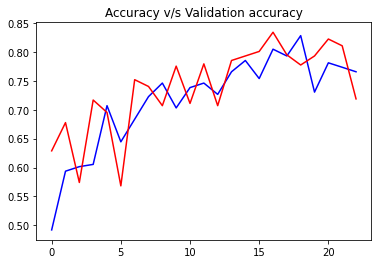

In [22]:
plt.plot(h['accuracy'], c='blue')
plt.plot(h['val_accuracy'], c='red')
plt.title('Accuracy v/s Validation accuracy')
plt.show()

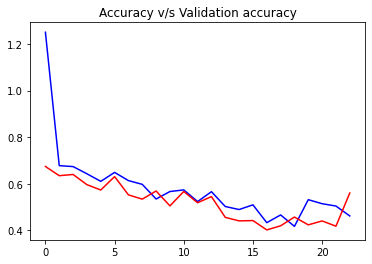

In [23]:
plt.plot(h['loss'], c='blue')
plt.plot(h['val_loss'], c='red')
plt.title('Accuracy v/s Validation accuracy')
plt.show()

In [24]:
# Model accuracy

from keras.models import load_model

model = load_model("/content/bestmodel.h5")     # Load the best model

# ACCURACY OBTAINED BY TYPICAL CNN

In [25]:
acc = model.evaluate_generator(test_data)[1]

print(f"The accuracy obtained by our model is {acc*100}%")

The accuracy obtained by our model is 79.38144207000732%


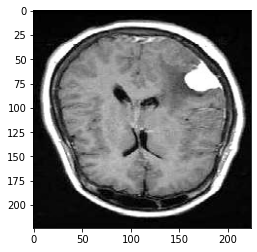


This MRI has a tumor


In [27]:
from keras.preprocessing.image import load_img, img_to_array

# Load a random image to test our model prediction upon
path="/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1143).jpg" # Tumorous
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict_classes(input_arr)[0][0]

if(pred==0):
  print("\nThis MRI has a tumor")
else:
  print("\nNo tumor")

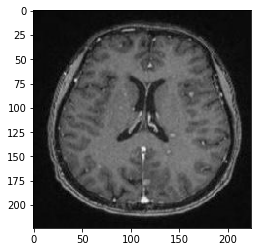


No tumor


In [29]:
path="/content/BrainTumorData/Brain Tumor Data Set/Healthey/Not Cancer  (1368).jpg" # Healthy
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict_classes(input_arr)[0][0]

if(pred==0):
  print("\nThis MRI has a tumor")
else:
  print("\nNo tumor")

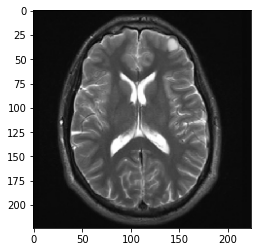


No tumor


In [30]:
path="/content/BrainTumorData/Brain Tumor Data Set/Healthey/Not Cancer  (191).jpg" # Healthy
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict_classes(input_arr)[0][0]

if(pred==0):
  print("\nThis MRI has a tumor")
else:
  print("\nNo tumor")